In [90]:
'''
Description of dataset can be found at:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

''' 

'\nDescription of dataset can be found at:\nhttps://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#\n\n'

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [158]:
sns.set_context("notebook", font_scale=1.9)

In [92]:
df= pd.read_excel('cc_data.xls',index_col=0)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, ID to 30000
Data columns (total 24 columns):
X1     30001 non-null object
X2     30001 non-null object
X3     30001 non-null object
X4     30001 non-null object
X5     30001 non-null object
X6     30001 non-null object
X7     30001 non-null object
X8     30001 non-null object
X9     30001 non-null object
X10    30001 non-null object
X11    30001 non-null object
X12    30001 non-null object
X13    30001 non-null object
X14    30001 non-null object
X15    30001 non-null object
X16    30001 non-null object
X17    30001 non-null object
X18    30001 non-null object
X19    30001 non-null object
X20    30001 non-null object
X21    30001 non-null object
X22    30001 non-null object
X23    30001 non-null object
Y      30001 non-null object
dtypes: object(24)
memory usage: 5.7+ MB


In [94]:
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [95]:
# X6 - x11: september_2005 - april_2005 - repayment status, -1 paid duly, 1-9 number of months delayed
# x12 - x17: september_2005 - april_2005 - amount of bill
# x18 - x23: september_2005 - april_2005 - amount paid
# default next month = 0 = no_default, 0 = default

In [96]:
df.columns = df.iloc[0]
df = df.drop(df.index[0])

In [97]:
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [98]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name='ID')

In [99]:
df.columns = ['credit_limit', 'sex', 'education', 'marriage', 'age',
              'pstatus_2005_09', 'pstatus_2005_08', 'pstatus_2005_07',
              'pstatus_2005_06', 'pstatus_2005_05', 'pstatus_2005_04',
              'bal_2005_09', 'bal_2005_08', 'bal_2005_07',
              'bal_2005_06', 'bal_2005_05', 'bal_2005_04',
              'payment_2005_09', 'payment_2005_08', 'payment_2005_07',
              'payment_2005_06', 'payment_2005_05', 'payment_2005_04',
              'default_next_month']

In [100]:
df.head(20)

,credit_limit,sex,education,marriage,age,pstatus_2005_09,pstatus_2005_08,pstatus_2005_07,pstatus_2005_06,pstatus_2005_05,pstatus_2005_04,bal_2005_09,bal_2005_08,bal_2005_07,bal_2005_06,bal_2005_05,bal_2005_04,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,default_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [101]:
# convert all columns to int
df = df.apply(pd.to_numeric)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
credit_limit          30000 non-null int64
sex                   30000 non-null int64
education             30000 non-null int64
marriage              30000 non-null int64
age                   30000 non-null int64
pstatus_2005_09       30000 non-null int64
pstatus_2005_08       30000 non-null int64
pstatus_2005_07       30000 non-null int64
pstatus_2005_06       30000 non-null int64
pstatus_2005_05       30000 non-null int64
pstatus_2005_04       30000 non-null int64
bal_2005_09           30000 non-null int64
bal_2005_08           30000 non-null int64
bal_2005_07           30000 non-null int64
bal_2005_06           30000 non-null int64
bal_2005_05           30000 non-null int64
bal_2005_04           30000 non-null int64
payment_2005_09       30000 non-null int64
payment_2005_08       30000 non-null int64
payment_2005_07       30000 non-null int64
payment_2005_06       30000 non-null

In [103]:
df.head(1)

,credit_limit,sex,education,marriage,age,pstatus_2005_09,pstatus_2005_08,pstatus_2005_07,pstatus_2005_06,pstatus_2005_05,pstatus_2005_04,bal_2005_09,bal_2005_08,bal_2005_07,bal_2005_06,bal_2005_05,bal_2005_04,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,default_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1


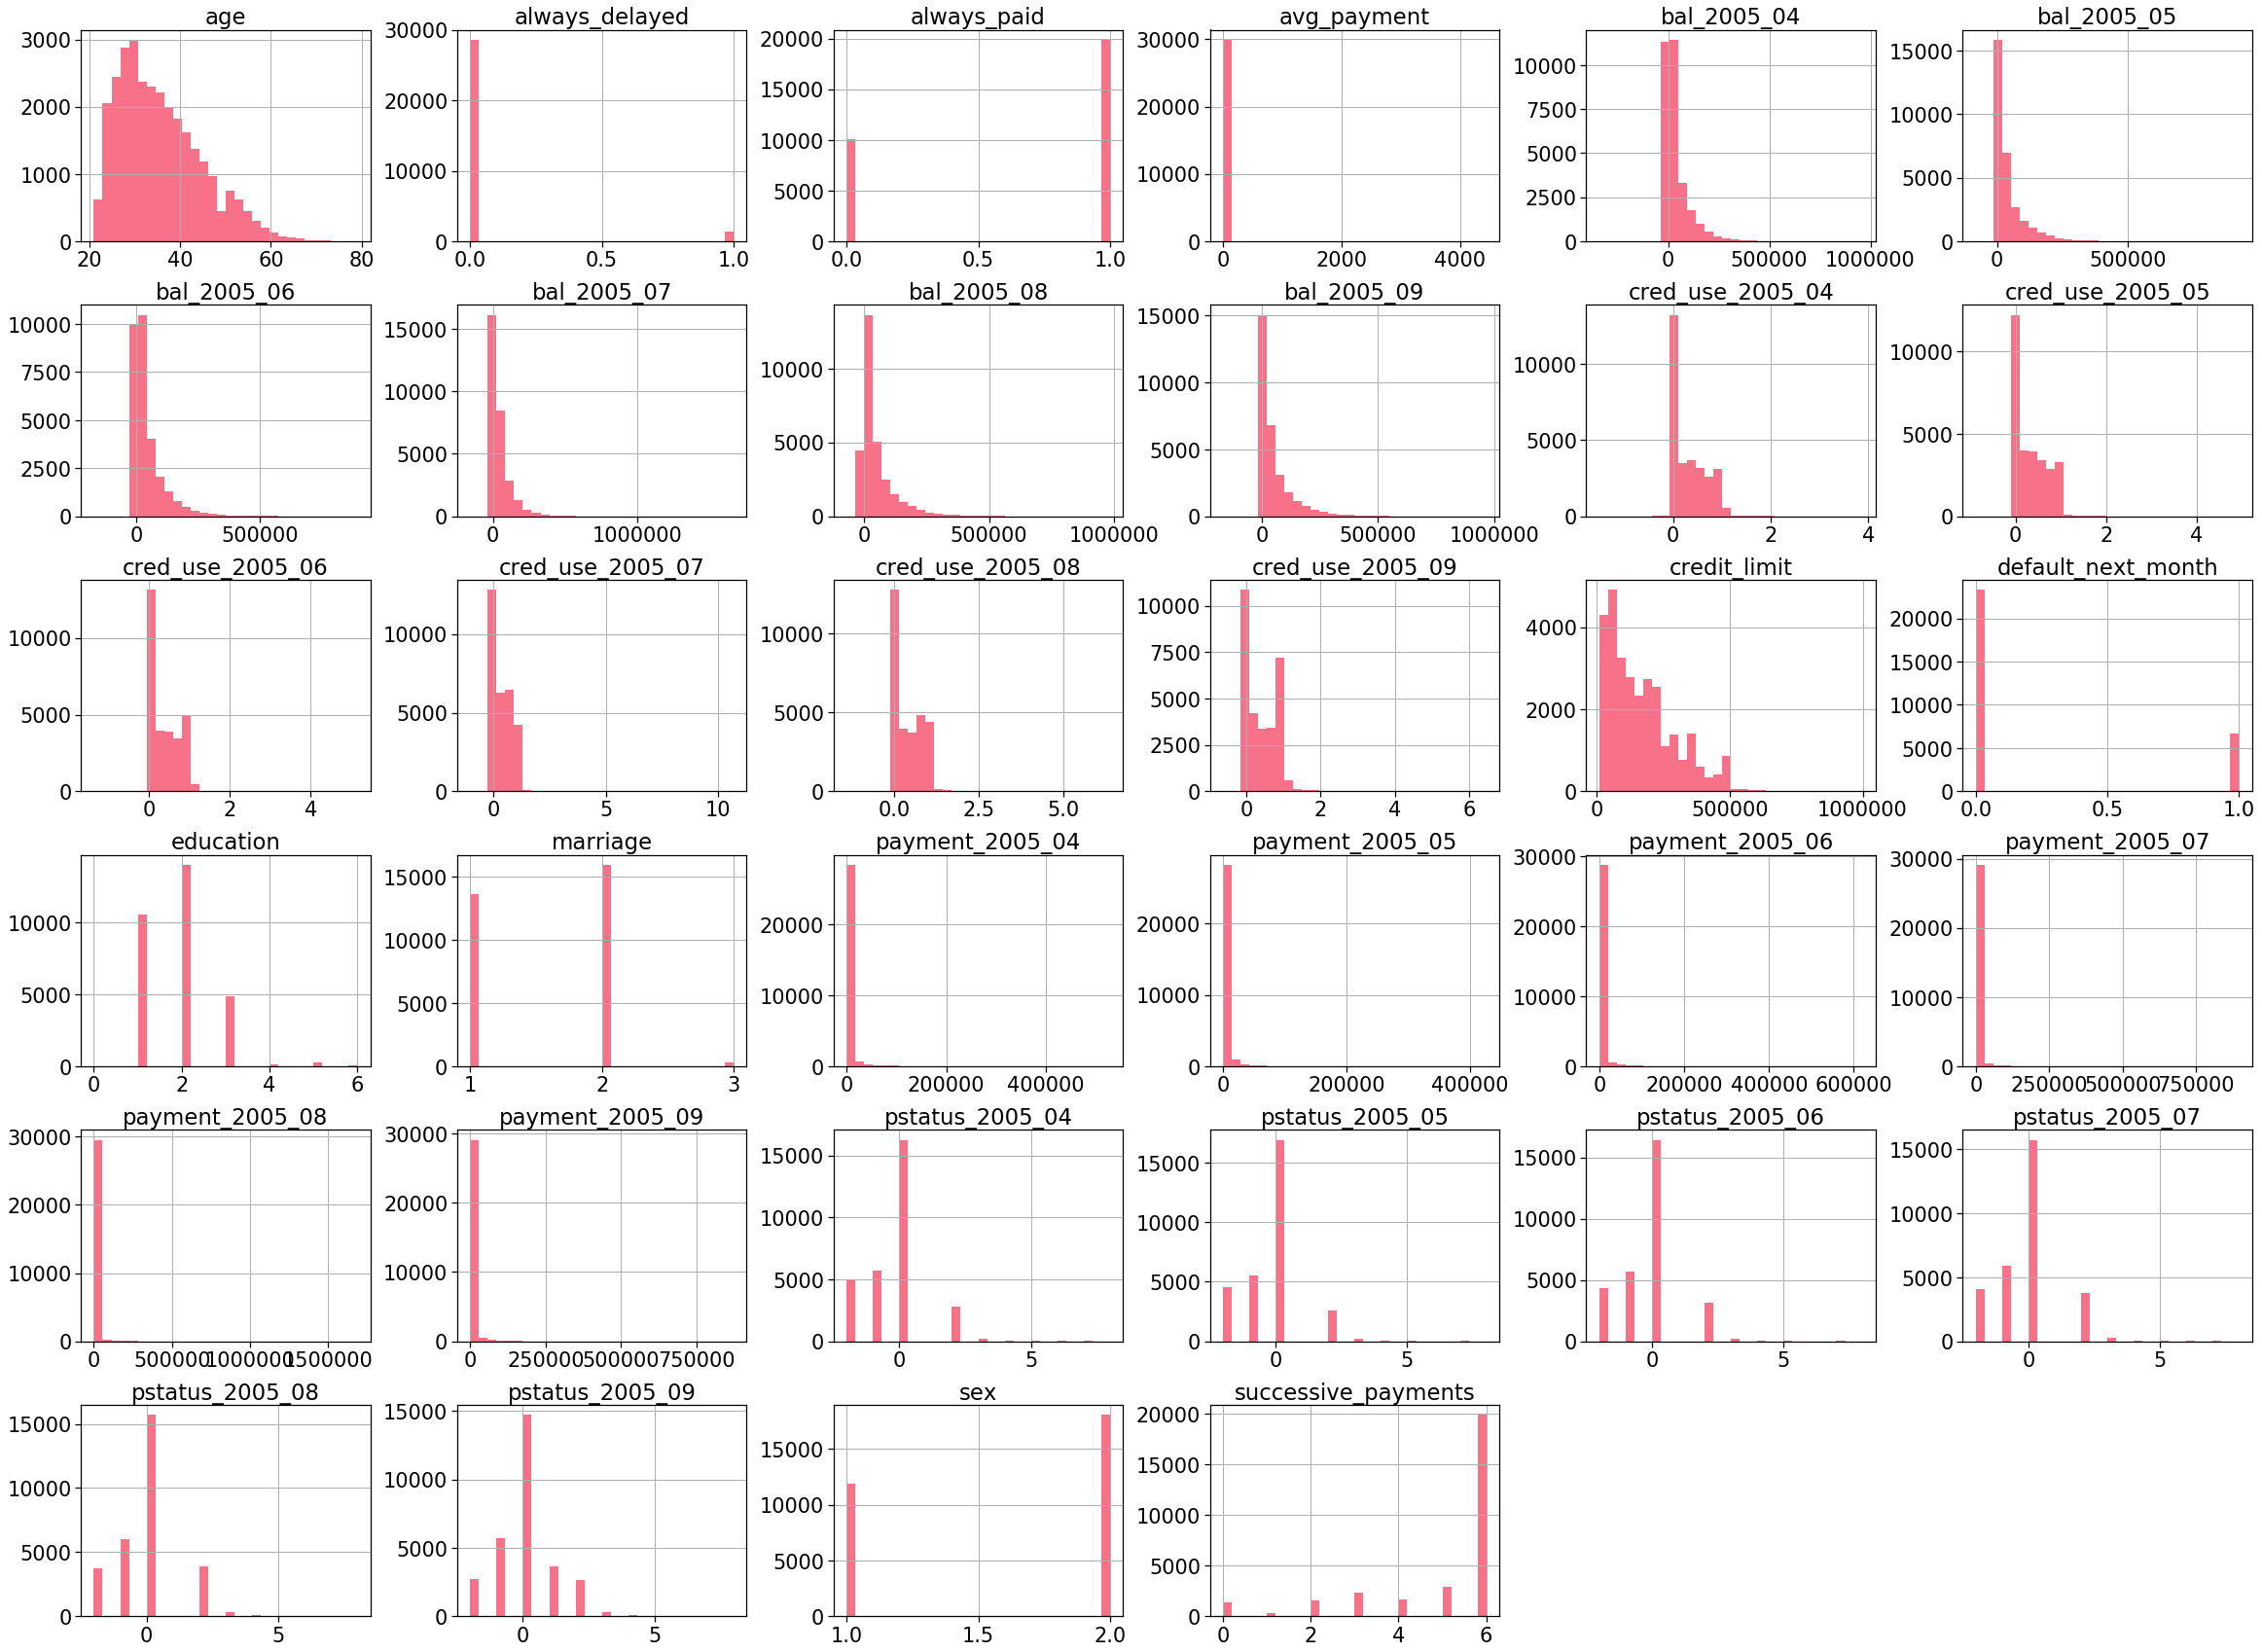

In [259]:
import warnings
warnings.filterwarnings('ignore')
df.hist(figsize = (40,30), bins=30);

In [104]:

payment_period = ['pstatus_2005_09', 'pstatus_2005_08', 'pstatus_2005_07',
              'pstatus_2005_06', 'pstatus_2005_05', 'pstatus_2005_04']
payment_amount = ['payment_2005_09', 'payment_2005_08', 'payment_2005_07',
                  'payment_2005_06', 'payment_2005_05', 'payment_2005_04']
balance_amount = ['bal_2005_09', 'bal_2005_08', 'bal_2005_07',
                  'bal_2005_06', 'bal_2005_05', 'bal_2005_04']
credit_periods = ['cred_use_2005_09', 'cred_use_2005_08', 'cred_use_2005_07',
                  'cred_use_2005_06', 'cred_use_2005_05', 'cred_use_2005_04']


time_series = balance_amount + payment_amount + ['credit_limit']
cat_features = ['sex','education','marriage','age']  + payment_period 
num_features = sorted(list(set(df.columns)-set(cat_features)-set(['default_next_month'])))


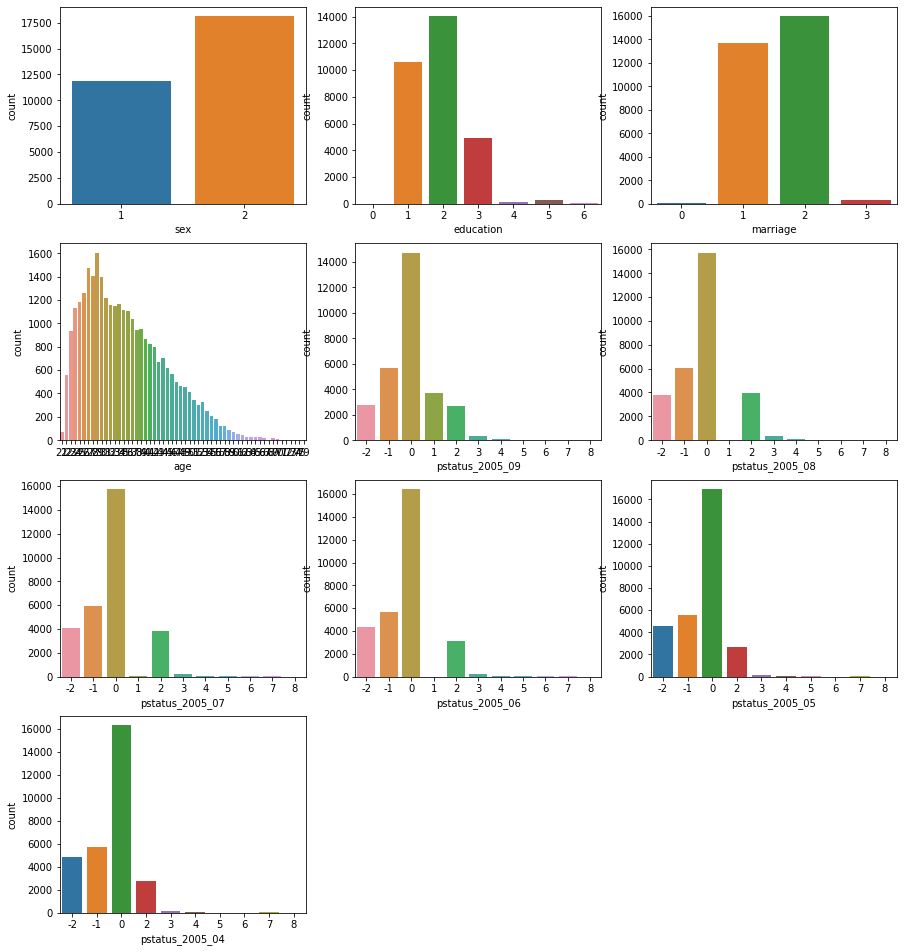

In [105]:
def cat_univariate_eda(df, cat_col_names, n_cols = 3, figsize = None, save_fig = False):
    
    # univariate eda for categorical features
    n_rows = len(cat_col_names)/n_cols
    
    plt.figure(figsize=(5*n_cols,5*n_rows))
    
    if figsize:
        plt.figure(figsize=figsize)
    
    for i in range(0,len(cat_col_names)):
        plt.subplot(n_rows+1, n_cols, (i+1))
        sns.countplot(df[cat_col_names[i]])
    
    if save_fig:
        plt.savefig('./cat_col_eda1.png')
    
    plt.show()
cat_univariate_eda(df, cat_features, save_fig = False)

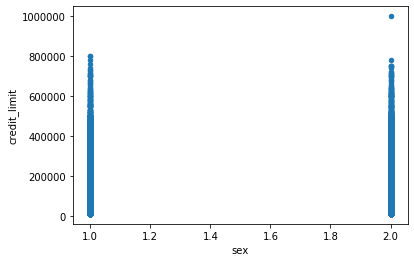

In [106]:
df.plot(kind = 'scatter', x = 'sex', y='credit_limit')

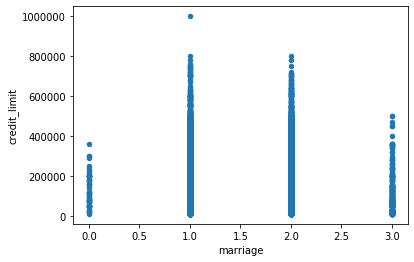

In [107]:
df.plot(kind = 'scatter', x = 'marriage', y='credit_limit')

In [108]:
df['marriage'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64

In [109]:
df = df[df['marriage'] > 0]

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29946 entries, 1 to 30000
Data columns (total 24 columns):
credit_limit          29946 non-null int64
sex                   29946 non-null int64
education             29946 non-null int64
marriage              29946 non-null int64
age                   29946 non-null int64
pstatus_2005_09       29946 non-null int64
pstatus_2005_08       29946 non-null int64
pstatus_2005_07       29946 non-null int64
pstatus_2005_06       29946 non-null int64
pstatus_2005_05       29946 non-null int64
pstatus_2005_04       29946 non-null int64
bal_2005_09           29946 non-null int64
bal_2005_08           29946 non-null int64
bal_2005_07           29946 non-null int64
bal_2005_06           29946 non-null int64
bal_2005_05           29946 non-null int64
bal_2005_04           29946 non-null int64
payment_2005_09       29946 non-null int64
payment_2005_08       29946 non-null int64
payment_2005_07       29946 non-null int64
payment_2005_06       29946 non-null

In [111]:
df[(df['bal_2005_09'] < 1) & (df['default_next_month'] == 1)]

,credit_limit,sex,education,marriage,age,pstatus_2005_09,pstatus_2005_08,pstatus_2005_07,pstatus_2005_06,pstatus_2005_05,pstatus_2005_04,bal_2005_09,bal_2005_08,bal_2005_07,bal_2005_06,bal_2005_05,bal_2005_04,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,default_next_month
27,60000,1,1,2,27,1,-2,-1,-1,-1,-1,-109,-425,259,-57,127,-189,0,1000,0,500,0,1000,1
39,50000,1,1,2,25,1,-1,-1,-2,-2,-2,0,780,0,0,0,0,780,0,0,0,0,0,1
46,210000,1,1,2,29,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
80,240000,2,2,2,44,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
122,450000,1,1,1,40,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29831,340000,1,1,2,33,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
29846,10000,1,2,1,37,1,-2,-1,3,2,0,-265,-265,5235,5007,4779,7680,0,5500,0,0,3000,2000,1
29909,140000,1,1,2,29,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
29974,230000,1,2,1,35,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1


In [112]:
# ideas for feature engineering:

# credit usage
# always_paid - 1 = yes, 0 = no
# always_delayed - 1 = yes, 0 = no
# successive_payments, example: yyynnn, ynynyn, yynyny, etc. potential sign of payment difficulty.
# 
# above average payment made -EDA to find out method to judge - payment amounts comparing non defaults vs defaults
# description doesn't mention payment status '-2'. looking at the data it looks like it means credit not used.
# based on '-2', clear_balance_months = total
# average payment when not paid in full or delayed.


In [113]:
# feature - credit usage based on balances between april 2005, sept 2005

for index, period in enumerate(credit_periods):
    df[period] = df[balance_amount[index]] / df['credit_limit']
#df['credit_usage'] = df['bal_2005_09'] / df['credit_limit']

C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [114]:
df.head()

,credit_limit,sex,education,marriage,age,pstatus_2005_09,pstatus_2005_08,pstatus_2005_07,pstatus_2005_06,pstatus_2005_05,pstatus_2005_04,bal_2005_09,bal_2005_08,bal_2005_07,bal_2005_06,bal_2005_05,bal_2005_04,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,default_next_month,cred_use_2005_09,cred_use_2005_08,cred_use_2005_07,cred_use_2005_06,cred_use_2005_05,cred_use_2005_04
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620


In [115]:
# customers using more than their credit limit.
df.loc[df['bal_2005_09'] > df['credit_limit']]

,credit_limit,sex,education,marriage,age,pstatus_2005_09,pstatus_2005_08,pstatus_2005_07,pstatus_2005_06,pstatus_2005_05,pstatus_2005_04,bal_2005_09,bal_2005_08,bal_2005_07,bal_2005_06,bal_2005_05,bal_2005_04,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,default_next_month,cred_use_2005_09,cred_use_2005_08,cred_use_2005_07,cred_use_2005_06,cred_use_2005_05,cred_use_2005_04
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,1.288000,1.141380,1.152160,0.387880,0.392380,0.400480
16,50000,2,3,3,23,1,2,0,0,0,0,50614,29173,28116,28771,29531,30211,0,1500,1100,1200,1300,1100,0,1.012280,0.583460,0.562320,0.575420,0.590620,0.604220
60,400000,2,2,1,29,0,0,0,0,0,0,400134,398857,404205,360199,356656,364089,17000,15029,30000,12000,12000,23000,0,1.000335,0.997143,1.010512,0.900497,0.891640,0.910223
62,70000,1,2,1,39,0,0,0,0,0,-1,70800,72060,69938,16518,14096,830,4025,2095,1000,2000,3000,0,0,1.011429,1.029429,0.999114,0.235971,0.201371,0.011857
109,130000,1,2,2,38,0,0,0,-1,-1,-1,171438,178382,39940,120483,44127,126568,10908,0,133657,4566,133841,4796,0,1.318754,1.372169,0.307231,0.926792,0.339438,0.973600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29932,60000,1,2,3,41,0,0,0,0,0,0,61118,50643,44004,26940,9971,-11798,2200,2000,1200,0,0,28000,0,1.018633,0.844050,0.733400,0.449000,0.166183,-0.196633
29941,20000,1,2,1,48,1,2,0,0,0,0,20733,20109,20126,18928,18761,18787,2,2019,11309,2000,700,1002,0,1.036650,1.005450,1.006300,0.946400,0.938050,0.939350
29968,50000,1,2,1,32,0,0,0,-1,2,0,50564,49710,0,50551,40590,39384,2686,0,50551,0,1600,1500,0,1.011280,0.994200,0.000000,1.011020,0.811800,0.787680
29977,40000,1,2,2,47,2,2,3,2,2,2,52358,54892,53415,51259,47151,46934,4000,0,2000,0,3520,0,1,1.308950,1.372300,1.335375,1.281475,1.178775,1.173350


In [116]:
# 

In [117]:
# feature - always paid flag - 1 = yes, 0 = no
df['always_paid'] = 0
for index, row in df.iterrows():
    if(row['pstatus_2005_09'] <= 0
       and row['pstatus_2005_08'] <= 0
       and row['pstatus_2005_07'] <= 0
       and row['pstatus_2005_06'] <= 0
       and row['pstatus_2005_05'] <= 0
       and row['pstatus_2005_04'] <= 0):
        df['always_paid'][index] = 1



C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

In [118]:
# feature - always delayed payment flag - 1 = yes, 0 = no
df['always_delayed'] = 0
for index, row in df.iterrows():
    if(row['pstatus_2005_09'] > 0
       and row['pstatus_2005_08'] > 0
       and row['pstatus_2005_07'] > 0
       and row['pstatus_2005_06'] > 0
       and row['pstatus_2005_05'] > 0
       and row['pstatus_2005_04'] > 0):
        df['always_delayed'][index] = 1


C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [119]:
df.head()

,credit_limit,sex,education,marriage,age,pstatus_2005_09,pstatus_2005_08,pstatus_2005_07,pstatus_2005_06,pstatus_2005_05,pstatus_2005_04,bal_2005_09,bal_2005_08,bal_2005_07,bal_2005_06,bal_2005_05,bal_2005_04,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,default_next_month,cred_use_2005_09,cred_use_2005_08,cred_use_2005_07,cred_use_2005_06,cred_use_2005_05,cred_use_2005_04,always_paid,always_delayed
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0,0
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0,0
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,1,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,1,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,1,0


In [120]:
# successive payments count
df['successive_payments'] = 0

for index, row in df.iterrows():
    paid_count = 0 
    s_paid_count = 0
# add to paid_count if customer makes minimum payment or above and keep count of
# successive payments using s_paid_count. update s_paid_count if its lower than the current count
# so that it always have the tally of highest successive count
# if customer hasn't made a payment ( > 0) reset current count as it's the end of
# successive count, start again and check other months.

    if df['pstatus_2005_09'][index] < 1:
        paid_count = paid_count + 1
        if s_paid_count < paid_count:
            s_paid_count = paid_count
    else:
        paid_count = 0
        
    if df['pstatus_2005_08'][index] < 1:
        paid_count = paid_count + 1
        if s_paid_count < paid_count:
            s_paid_count = paid_count
    else:
        paid_count = 0
    
    if df['pstatus_2005_07'][index] < 1:
        paid_count = paid_count + 1
        if s_paid_count < paid_count:
            s_paid_count = paid_count
    else:
        paid_count = 0

    if df['pstatus_2005_06'][index] < 1:
        paid_count = paid_count + 1
        if s_paid_count < paid_count:
            s_paid_count = paid_count
    else:
        paid_count = 0
        
    if df['pstatus_2005_05'][index] < 1:
        paid_count = paid_count + 1
        if s_paid_count < paid_count:
            s_paid_count = paid_count
    else:
        paid_count = 0
    
    if df['pstatus_2005_04'][index] < 1:
        paid_count = paid_count + 1
        if s_paid_count < paid_count:
            s_paid_count = paid_count
    else:
        paid_count = 0
        
    df['successive_payments'][index] = s_paid_count
    
    

C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [121]:
# check that the successive_payments feature is correct.
df.head(20)

,credit_limit,sex,education,marriage,age,pstatus_2005_09,pstatus_2005_08,pstatus_2005_07,pstatus_2005_06,pstatus_2005_05,pstatus_2005_04,bal_2005_09,bal_2005_08,bal_2005_07,bal_2005_06,bal_2005_05,bal_2005_04,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,default_next_month,cred_use_2005_09,cred_use_2005_08,cred_use_2005_07,cred_use_2005_06,cred_use_2005_05,cred_use_2005_04,always_paid,always_delayed,successive_payments
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0,0,4
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0,0,3
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,1,0,6
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,1,0,6
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,1,0,6
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,1.288000,1.141380,1.152160,0.387880,0.392380,0.400480,1,0,6
7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,0.735930,0.824046,0.890014,1.085306,0.966006,0.947888,1,0,6
8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,0.118760,0.003800,0.006010,0.002210,-0.001590,0.005670,1,0,6
9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,0.080607,0.100686,0.086486,0.087221,0.084236,0.026564,0,0,3
10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,0.000000,0.000000,0.000000,0.000000,0.650350,0.695600,1,0,6


In [122]:
# what does payment status of 0 mean?
# upon searching for the meaning on google, found the following:
# -2 = paid in full with no transactions, -1 paid in full with new transactions, 0 paid minimum.
# positive values are number of months of delayed payment

In [123]:
df.loc[df['successive_payments'] == 1]

,credit_limit,sex,education,marriage,age,pstatus_2005_09,pstatus_2005_08,pstatus_2005_07,pstatus_2005_06,pstatus_2005_05,pstatus_2005_04,bal_2005_09,bal_2005_08,bal_2005_07,bal_2005_06,bal_2005_05,bal_2005_04,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,default_next_month,cred_use_2005_09,cred_use_2005_08,cred_use_2005_07,cred_use_2005_06,cred_use_2005_05,cred_use_2005_04,always_paid,always_delayed,successive_payments
51,70000,1,3,2,42,1,2,2,2,2,0,37042,36171,38355,39423,38659,39362,0,3100,2000,0,1500,1500,1,0.529171,0.516729,0.547929,0.563186,0.552271,0.562314,0,0,1
59,200000,2,1,2,34,-1,3,2,2,2,2,1587,1098,782,1166,700,1414,0,0,700,0,1200,0,0,0.007935,0.005490,0.003910,0.005830,0.003500,0.007070,0,0,1
105,60000,2,2,2,26,2,2,2,2,2,0,56685,55208,59175,60218,55447,55305,0,5000,2511,6,3000,3000,0,0.944750,0.920133,0.986250,1.003633,0.924117,0.921750,0,0,1
161,30000,1,1,2,41,2,2,2,2,2,0,24357,27453,26718,28168,27579,28321,3500,0,2200,0,1200,1250,0,0.811900,0.915100,0.890600,0.938933,0.919300,0.944033,0,0,1
327,220000,2,2,1,41,-1,2,2,-1,2,-1,650,650,325,950,475,325,325,0,950,0,325,325,1,0.002955,0.002955,0.001477,0.004318,0.002159,0.001477,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29339,30000,1,2,2,26,6,5,4,3,2,0,33181,32391,31624,30683,29215,29900,0,8,0,0,1015,1000,1,1.106033,1.079700,1.054133,1.022767,0.973833,0.996667,0,0,1
29346,20000,1,2,2,27,1,2,2,2,2,0,17569,18478,19884,20218,19687,20307,1500,2000,1000,0,1000,1000,1,0.878450,0.923900,0.994200,1.010900,0.984350,1.015350,0,0,1
29733,10000,1,2,1,45,1,2,2,2,2,-2,6321,6075,10062,6267,-610,-220,0,4312,0,0,780,1150,0,0.632100,0.607500,1.006200,0.626700,-0.061000,-0.022000,0,0,1
29772,10000,1,2,1,37,-1,4,3,2,2,2,7501,7243,6988,6730,7463,7199,0,0,0,1000,0,3000,1,0.750100,0.724300,0.698800,0.673000,0.746300,0.719900,0,0,1


In [124]:

df['avg_payment'] = int(0)
for index, row in df.iterrows():
    payments = []
    
    for p in range(len(payment_period)):
        if (row[payment_period[p]] == 0): payments.append(int(row[payment_amount[p]]))
    
    df['avg_payment'][index] = round(np.mean(payments),2)



C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

In [125]:
df.head(10)

,credit_limit,sex,education,marriage,age,pstatus_2005_09,pstatus_2005_08,pstatus_2005_07,pstatus_2005_06,pstatus_2005_05,pstatus_2005_04,bal_2005_09,bal_2005_08,bal_2005_07,bal_2005_06,bal_2005_05,bal_2005_04,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,default_next_month,cred_use_2005_09,cred_use_2005_08,cred_use_2005_07,cred_use_2005_06,cred_use_2005_05,cred_use_2005_04,always_paid,always_delayed,successive_payments,avg_payment
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0,0,4,NaN
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0,0,3,666.67
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,1,0,6,1836.33
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,1,0,6,1398.00
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,1,0,6,11762.25
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,1.288000,1.141380,1.152160,0.387880,0.392380,0.400480,1,0,6,1295.33
7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,0.735930,0.824046,0.890014,1.085306,0.966006,0.947888,1,0,6,30126.50
8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,0.118760,0.003800,0.006010,0.002210,-0.001590,0.005670,1,0,6,882.67
9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,0.080607,0.100686,0.086486,0.087221,0.084236,0.026564,0,0,3,1265.80
10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,0.000000,0.000000,0.000000,0.000000,0.650350,0.695600,1,0,6,NaN


In [126]:
# the NaN is a result of customers that have either been paying in full  or late.

In [127]:
df.loc[df['avg_payment'].isnull().values]

,credit_limit,sex,education,marriage,age,pstatus_2005_09,pstatus_2005_08,pstatus_2005_07,pstatus_2005_06,pstatus_2005_05,pstatus_2005_04,bal_2005_09,bal_2005_08,bal_2005_07,bal_2005_06,bal_2005_05,bal_2005_04,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,default_next_month,cred_use_2005_09,cred_use_2005_08,cred_use_2005_07,cred_use_2005_06,cred_use_2005_05,cred_use_2005_04,always_paid,always_delayed,successive_payments,avg_payment
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0,0,4,NaN
10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,0.000000,0.000000,0.000000,0.000000,0.650350,0.695600,1,0,6,NaN
12,260000,2,1,2,51,-1,-1,-1,-1,-1,2,12261,21670,9966,8517,22287,13668,21818,9966,8583,22301,0,3640,0,0.047158,0.083346,0.038331,0.032758,0.085719,0.052569,0,0,5,NaN
19,360000,2,1,1,49,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,5,NaN
20,180000,2,1,2,29,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,240000,1,1,2,30,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,6,NaN
29987,360000,1,1,2,35,-1,-1,-2,-2,-2,-2,2220,0,0,0,0,0,0,0,0,0,0,0,0,0.006167,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,6,NaN
29990,150000,1,1,2,35,-1,-1,-1,-1,-1,-2,3425,9009,-3,780,0,0,9054,0,783,0,0,0,0,0.022833,0.060060,-0.000020,0.005200,0.000000,0.000000,1,0,6,NaN
29992,210000,1,2,1,34,3,2,2,2,2,2,2500,2500,2500,2500,2500,2500,0,0,0,0,0,0,1,0.011905,0.011905,0.011905,0.011905,0.011905,0.011905,0,1,0,NaN


In [128]:
# don't think average payment on it's own will work, average payment as percentage of balance would be better.

In [129]:

df['avg_payment'] = float(0)
for index, row in df.iterrows():
    payments = []
    
    for p in range(len(payment_period)):
        if (row[payment_period[p]] <= 0) & (row[balance_amount[p]] > 0) & (row[payment_amount[p]] != 0):
            payments.append(row[payment_amount[p]] / row[balance_amount[p]])
            
        elif (row[balance_amount[p]] <= 0):
            payments.append(1)
            
        elif (row[payment_period[p]] > 0) & (row[balance_amount[p]] > 0):
            payments.append(0)
    df['avg_payment'][index] = np.mean(payments)



C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [130]:
df.head(20)

,credit_limit,sex,education,marriage,age,pstatus_2005_09,pstatus_2005_08,pstatus_2005_07,pstatus_2005_06,pstatus_2005_05,pstatus_2005_04,bal_2005_09,bal_2005_08,bal_2005_07,bal_2005_06,bal_2005_05,bal_2005_04,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,default_next_month,cred_use_2005_09,cred_use_2005_08,cred_use_2005_07,cred_use_2005_06,cred_use_2005_05,cred_use_2005_04,always_paid,always_delayed,successive_payments,avg_payment
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0,0,4,0.600000
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0,0,3,0.169620
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,1,0,6,0.115141
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,1,0,6,0.036396
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,1,0,6,1.246958
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,1.288000,1.141380,1.152160,0.387880,0.392380,0.400480,1,0,6,0.037419
7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,0.735930,0.824046,0.890014,1.085306,0.966006,0.947888,1,0,6,0.071127
8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,0.118760,0.003800,0.006010,0.002210,-0.001590,0.005670,1,0,6,1.592422
9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,0.080607,0.100686,0.086486,0.087221,0.084236,0.026564,0,0,3,0.146114
10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,0.000000,0.000000,0.000000,0.000000,0.650350,0.695600,1,0,6,0.817252


In [131]:
df.loc[df['avg_payment'].isnull().values].head(50)

,credit_limit,sex,education,marriage,age,pstatus_2005_09,pstatus_2005_08,pstatus_2005_07,pstatus_2005_06,pstatus_2005_05,pstatus_2005_04,bal_2005_09,bal_2005_08,bal_2005_07,bal_2005_06,bal_2005_05,bal_2005_04,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,default_next_month,cred_use_2005_09,cred_use_2005_08,cred_use_2005_07,cred_use_2005_06,cred_use_2005_05,cred_use_2005_04,always_paid,always_delayed,successive_payments,avg_payment
28985,180000,2,1,2,35,0,0,0,0,0,0,5450,150,150,150,150,150,0,0,0,0,0,0,1,0.030278,0.000833,0.000833,0.000833,0.000833,0.000833,1,0,6,NaN


In [132]:
df['default_next_month'].value_counts(normalize=True)

0    0.778568
1    0.221432
Name: default_next_month, dtype: float64

In [133]:
np.mean(df[credit_periods])

cred_use_2005_09    0.424042
cred_use_2005_08    0.411366
cred_use_2005_07    0.392480
cred_use_2005_06    0.359739
cred_use_2005_05    0.333348
cred_use_2005_04    0.318812
dtype: float64

In [134]:
#dropping one value that has low credit usage, no delayed payments, 
df.dropna(inplace=True)

C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29945 entries, 1 to 30000
Data columns (total 34 columns):
credit_limit           29945 non-null int64
sex                    29945 non-null int64
education              29945 non-null int64
marriage               29945 non-null int64
age                    29945 non-null int64
pstatus_2005_09        29945 non-null int64
pstatus_2005_08        29945 non-null int64
pstatus_2005_07        29945 non-null int64
pstatus_2005_06        29945 non-null int64
pstatus_2005_05        29945 non-null int64
pstatus_2005_04        29945 non-null int64
bal_2005_09            29945 non-null int64
bal_2005_08            29945 non-null int64
bal_2005_07            29945 non-null int64
bal_2005_06            29945 non-null int64
bal_2005_05            29945 non-null int64
bal_2005_04            29945 non-null int64
payment_2005_09        29945 non-null int64
payment_2005_08        29945 non-null int64
payment_2005_07        29945 non-null int64
payment_2005_06 

In [202]:
df_a = df.copy()
    
#     df_a['default'] = 0
#     df_a['non_default'] = 0
#     df_a['successive_payments']
#     df_a['avg_payment']
df_a['age_group'] = ' '     
        
for index, row in df_a.iterrows():
    if row['age'] < 30: df_a['age_group'][index] = '< 30'
    elif 30 >= row['age'] < 40: df_a['age_group'][index] = '30 - 40'
    elif 40 >= row['age'] < 50: df_a['age_group'][index] = '40 - 50'
    elif 50 >= row['age'] < 60: df_a['age_group'][index] = '50 - 60'
    elif 60 >= row['age'] < 70: df_a['age_group'][index] = '60 - 70'
    elif 70 >= row['age'] < 80: df_a['age_group'][index] = '70 - 80'
    else: df_a['age_group'][index] = ' > 80'

    

C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

successive_payments
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
Name: sex, dtype: object

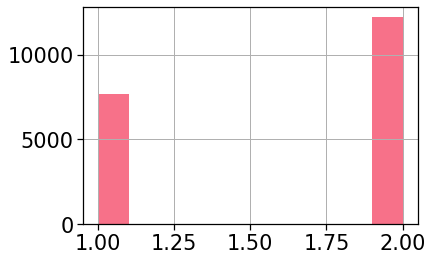

In [205]:

df_a.groupby('successive_payments').sex.hist()

successive_payments
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
Name: marriage, dtype: object

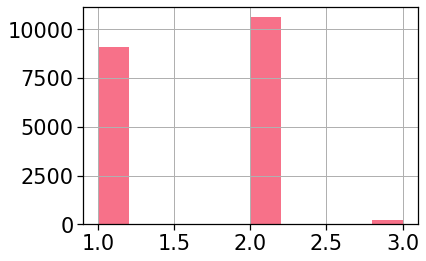

In [206]:
df_a.groupby('successive_payments').marriage.hist()

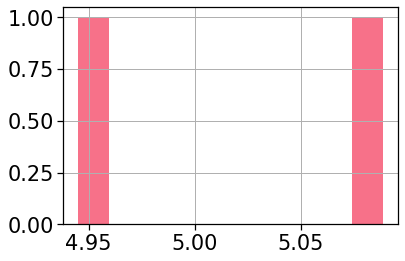

In [223]:
df_a.groupby('sex').mean()

successive_payments
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
Name: sex, dtype: object

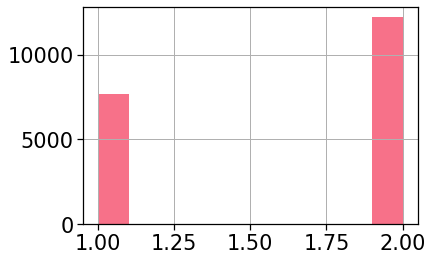

In [224]:
df_a.groupby('successive_payments').sex.hist()

In [234]:
names = df_a['age_group'].unique()

In [244]:
df_a2 = pd.DataFrame(columns=names)

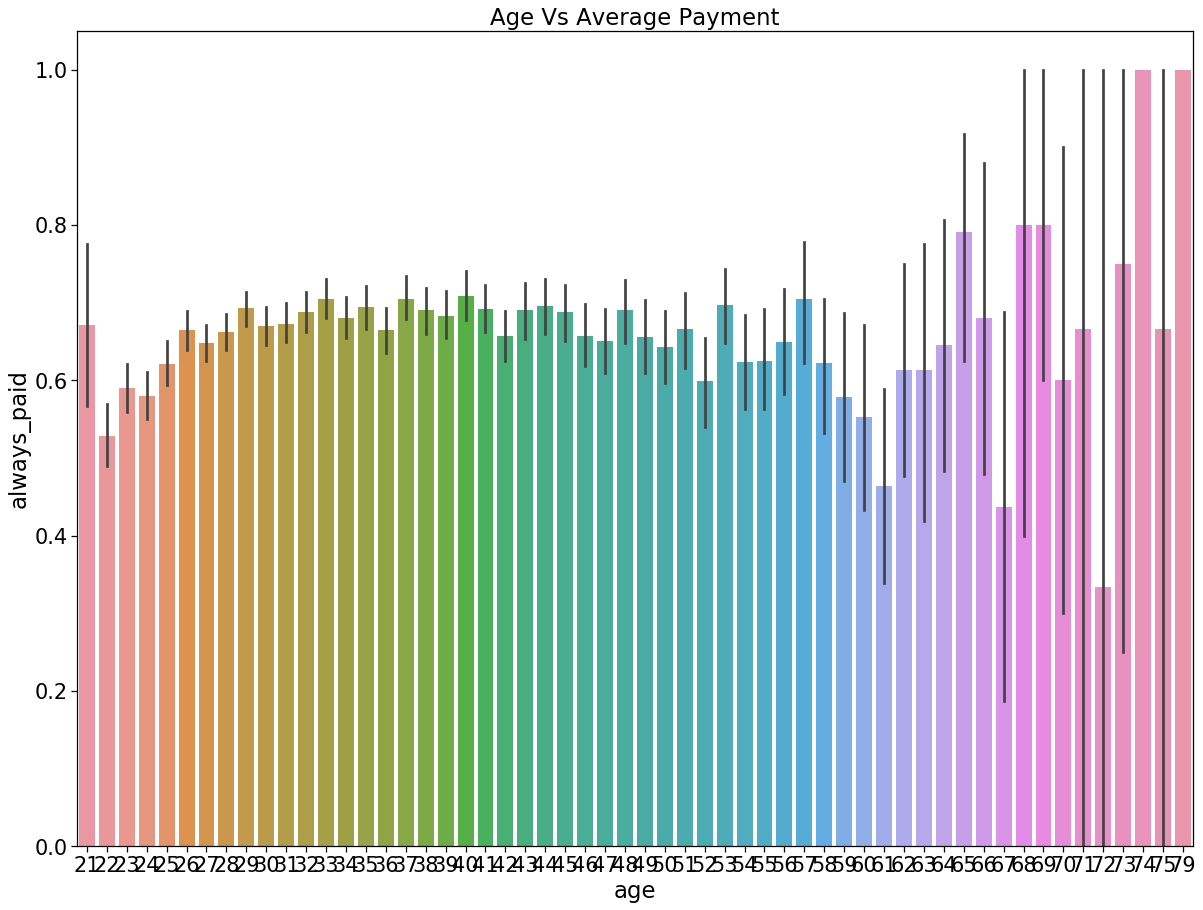

In [254]:
sns.set_palette("husl")
plt.figure(figsize=(20,15))
ax = sns.barplot(x="age", y="always_paid",data=df_a).set_title("Age Vs Average Payment")

In [245]:
df_a2

,< 30,40 - 50,60 - 70,50 - 60,30 - 40,70 - 80,> 80


In [233]:


plt.figure(figsize=(20,15))
x = df_a['age_group']
y = df_a['default_next_month' == 1]
ax = sns.barplot(x,y).set_title(" Ags vs Defaults")
#ax2 = sns.plot(df3)
plt.xlabel('Age Group')
# # Set y-axis label
plt.ylabel('Defaults')

KeyError: False

<Figure size 1440x1080 with 0 Axes>

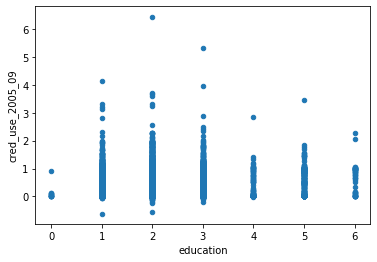

In [136]:
df.plot(kind = 'scatter', x = 'education', y=credit_periods[0]) # sept 2005

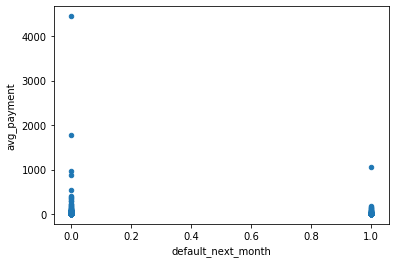

In [137]:
df.plot(kind = 'scatter', x = 'default_next_month', y='avg_payment')

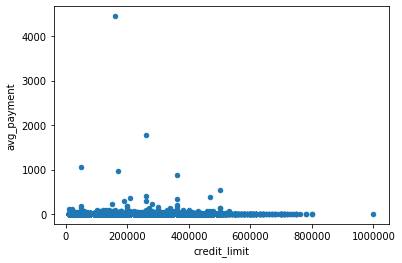

In [138]:
df.plot(kind = 'scatter', x = 'credit_limit', y='avg_payment')

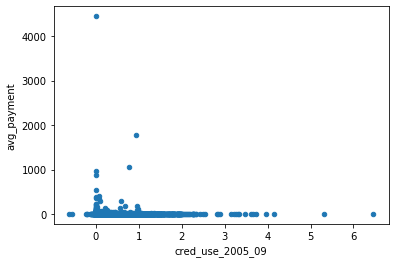

In [139]:
df.plot(kind = 'scatter', x = credit_periods[0], y='avg_payment')

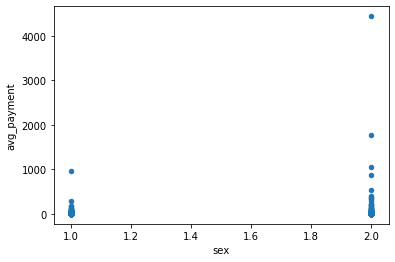

In [140]:
df.plot(kind = 'scatter', x = 'sex', y='avg_payment')

In [141]:
# this suggests females make larger avrage payments

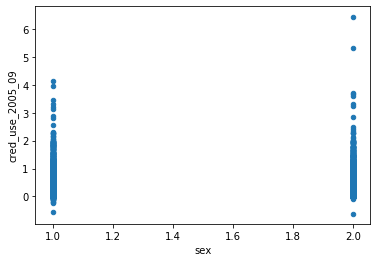

In [142]:
df.plot(kind = 'scatter', x = 'sex', y=credit_periods[0])

Text(0, 0.5, 'Credit Usage')

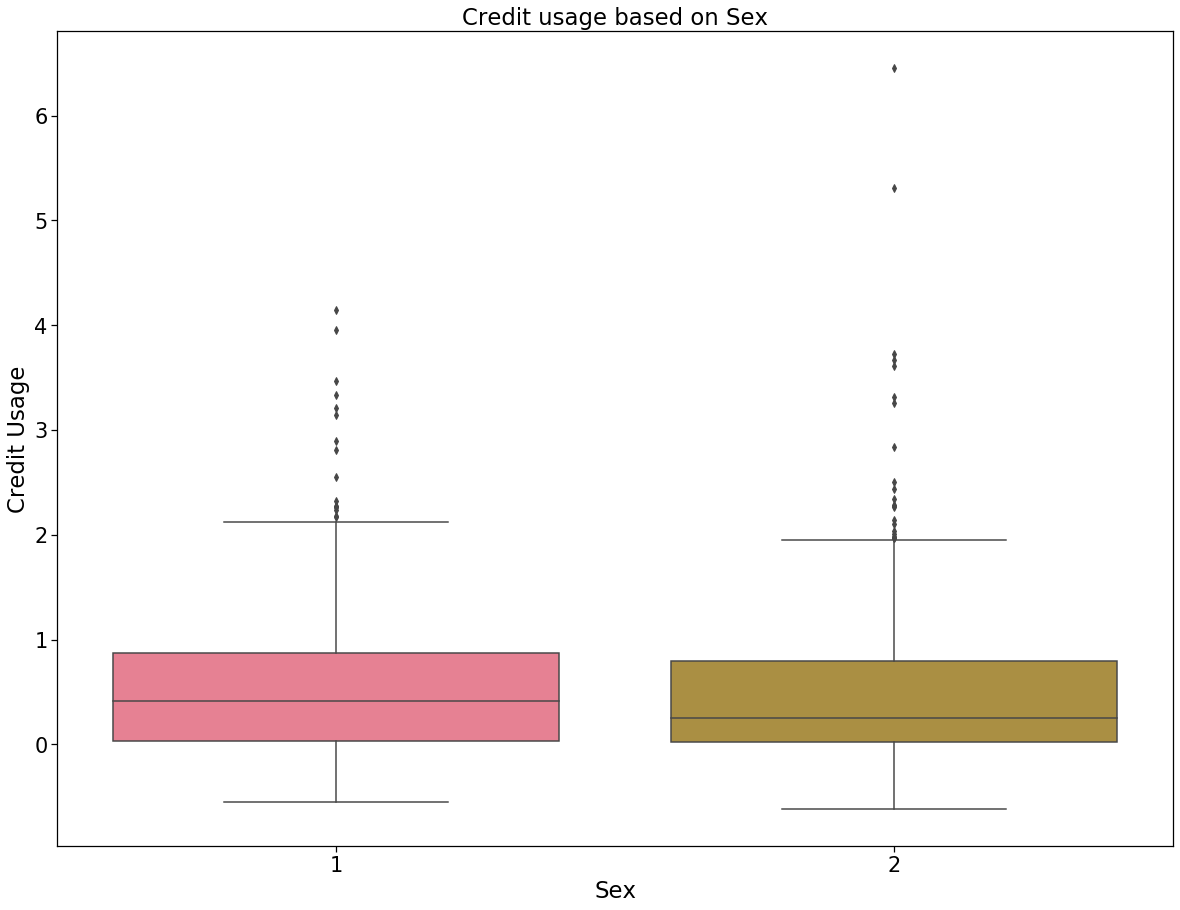

In [161]:
sns.set_palette("husl")
plt.figure(figsize=(20,15))
ax = sns.boxplot(x="sex", y="cred_use_2005_09",data=df).set_title("Credit usage based on Sex")
plt.xlabel('Sex')
# Set y-axis label
plt.ylabel('Credit Usage')

Text(0, 0.5, 'Average Payments')

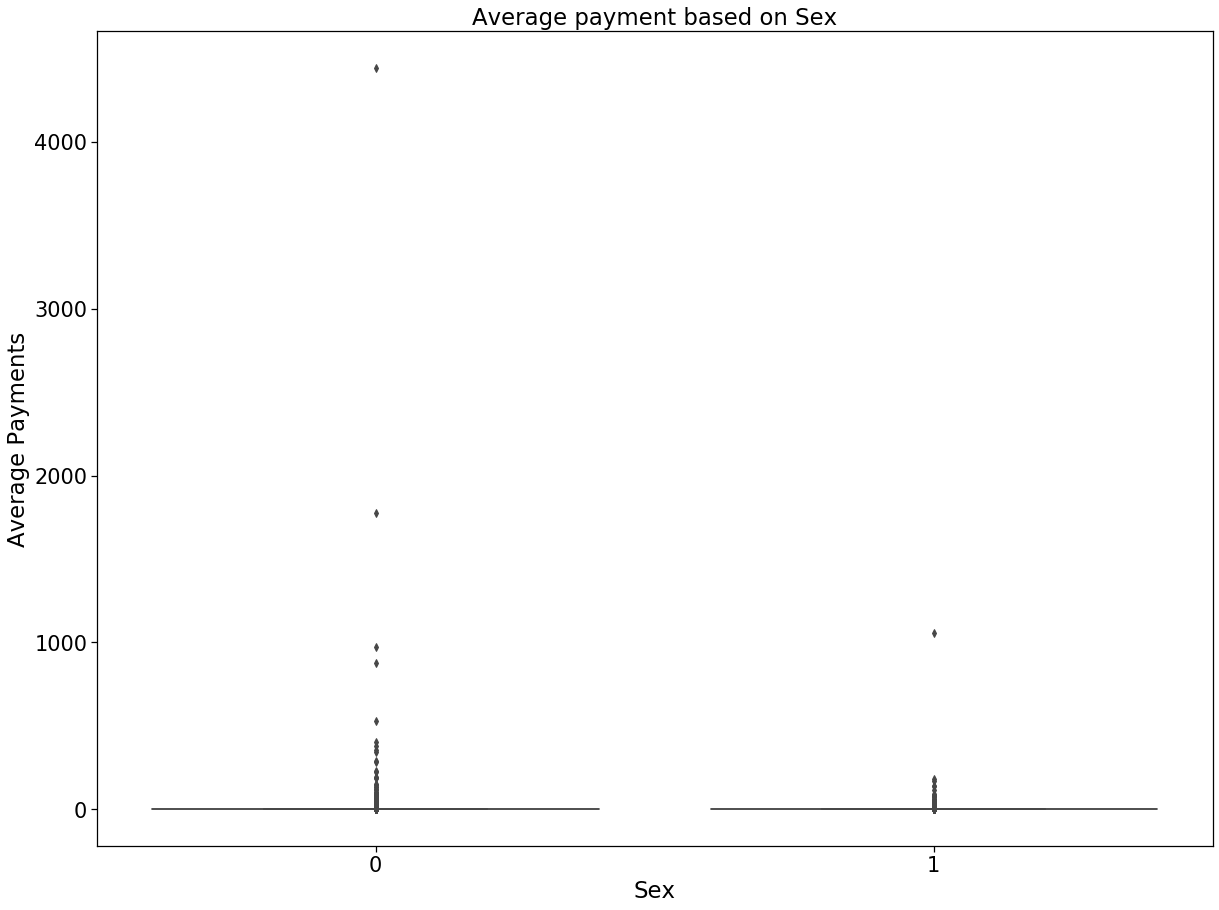

In [196]:
sns.set_palette("husl")
plt.figure(figsize=(20,15))
ax = sns.boxplot(x="default_next_month", y="avg_payment",data=df).set_title("Average payment based on Sex")
plt.xlabel('Sex')
# Set y-axis label
plt.ylabel('Average Payments')

In [190]:
default_mean = np.mean(df[df['default_next_month'] == 1]['successive_payments'])

In [191]:
nondefault_mean = np.mean(df[df['default_next_month'] == 0]['successive_payments'])

Text(0, 0.5, 'Frequency')

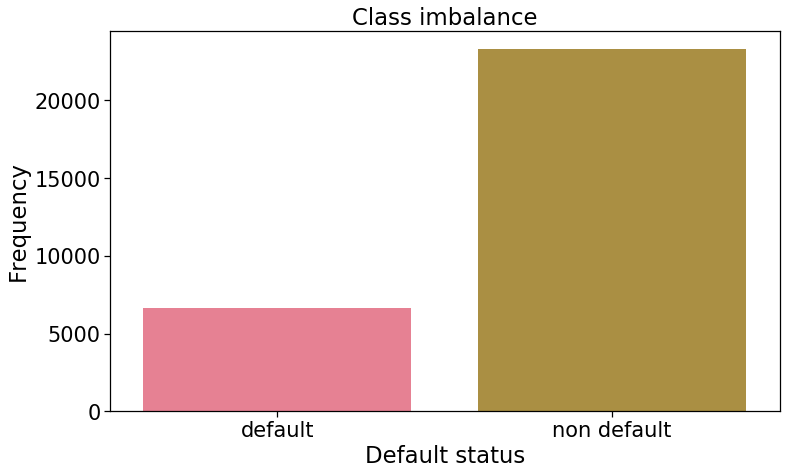

In [257]:
plt.figure(figsize=(12,7))
x = ['default', 'non default']
y = [len(df[df['default_next_month'] == 1]), len(df[df['default_next_month'] == 0])]

ax = sns.barplot(x, y).set_title('Class imbalance')

plt.xlabel('Default status')
# # Set y-axis label
plt.ylabel('Frequency')

Text(0, 0.5, 'Successive Payments')

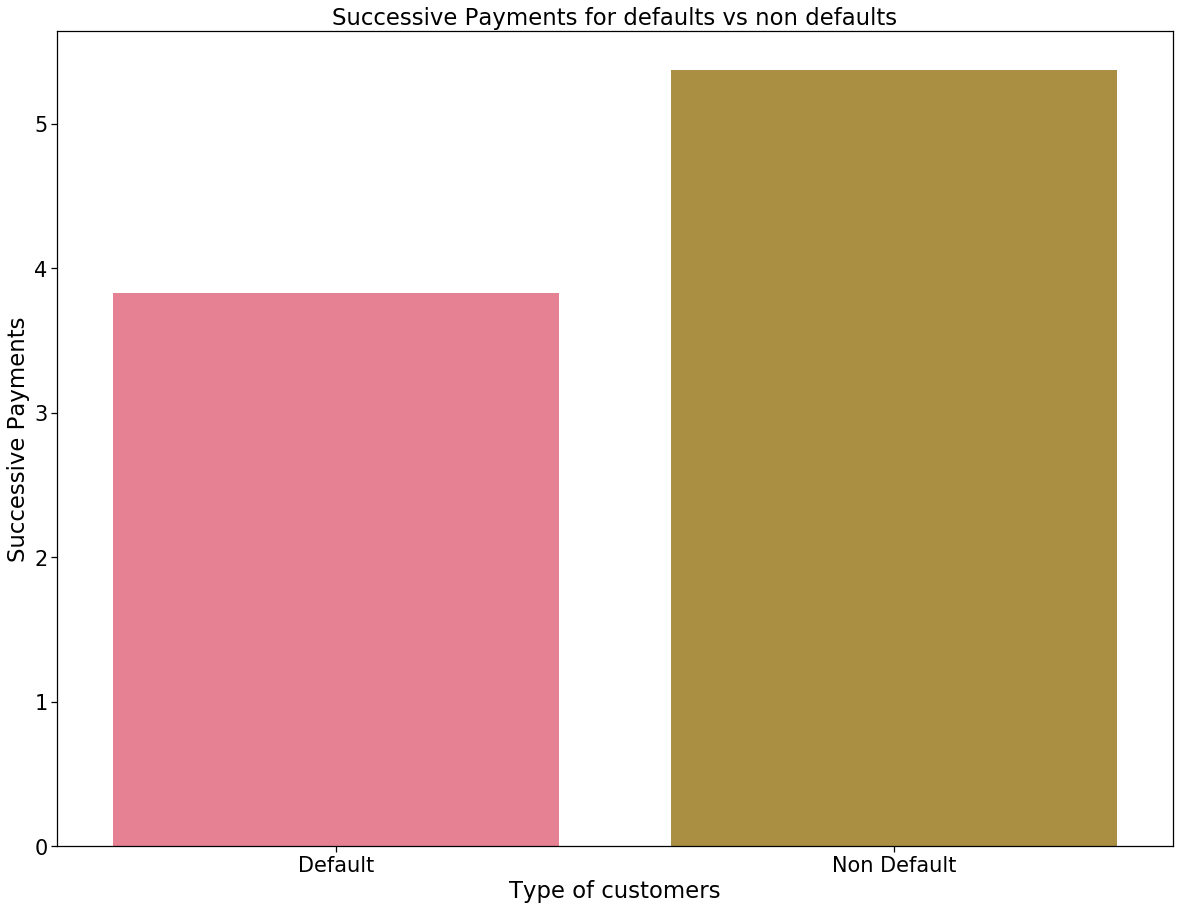

In [195]:
plt.figure(figsize=(20,15))
x = ['Default', 'Non Default']
y = [default_mean, nondefault_mean]
ax = sns.barplot(x,y).set_title("Successive Payments for defaults vs non defaults")
#ax2 = sns.plot(df3)
plt.xlabel('Type of customers')
# # Set y-axis label
plt.ylabel('Successive Payments')

In [ ]:
plt.figure(figsize=(20,15))
x = ['Default', 'Non Default']
y = [default_mean, nondefault_mean]
ax = sns.barplot(x,y).set_title("Successive Payments for defaults vs non defaults")
#ax2 = sns.plot(df3)
plt.xlabel('Type of customers')
# # Set y-axis label
plt.ylabel('Successive Payments')

In [143]:
# females have more outliers that use more credit

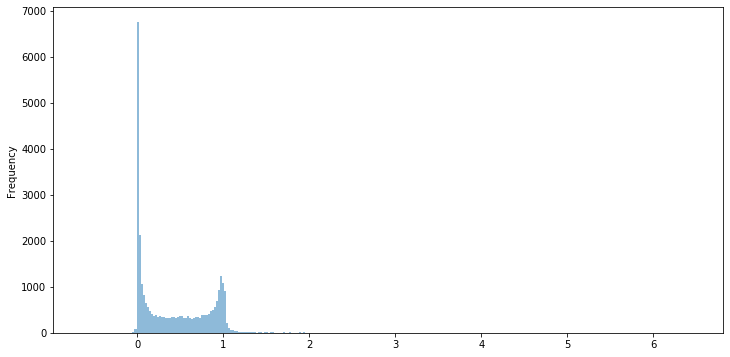

In [144]:
plt.figure(figsize=(12,6))
df[credit_periods[0]].plot.hist(bins=300, alpha=0.5)

In [145]:
# looks like a really long right tail, how many people who use more than 100% of their credit?

Text(0, 0.5, 'Frequency')

<Figure size 864x432 with 0 Axes>

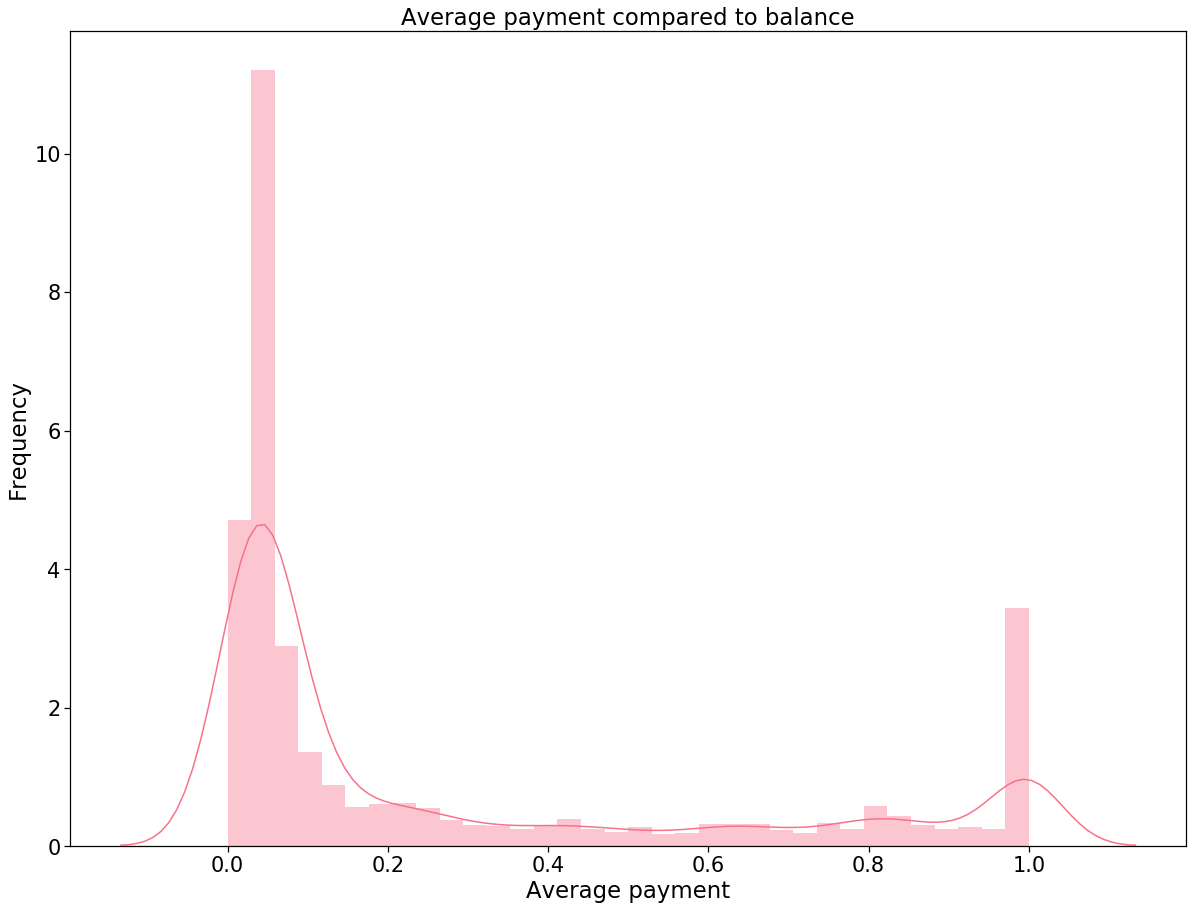

In [262]:
plt.figure(figsize=(12,6))
data = df[df['avg_payment'] <=1]['avg_payment']

plt.figure(figsize=(20,15))
x = ['Default', 'Non Default']
y = [default_mean, nondefault_mean]
ax = sns.distplot(data).set_title("Average payment compared to balance")
#ax2 = sns.plot(df3)
plt.xlabel('Average payment')
# # Set y-axis label
plt.ylabel('Frequency')



In [147]:
df[df[credit_periods[0]] > 1.5]

,credit_limit,sex,education,marriage,age,pstatus_2005_09,pstatus_2005_08,pstatus_2005_07,pstatus_2005_06,pstatus_2005_05,pstatus_2005_04,bal_2005_09,bal_2005_08,bal_2005_07,bal_2005_06,bal_2005_05,bal_2005_04,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,default_next_month,cred_use_2005_09,cred_use_2005_08,cred_use_2005_07,cred_use_2005_06,cred_use_2005_05,cred_use_2005_04,always_paid,always_delayed,successive_payments,avg_payment
233,50000,1,2,1,26,0,0,-2,-1,-1,0,102800,0,0,2624,45567,46557,0,0,2624,45567,1747,2000,0,2.056000,0.000000,0.000000,0.052480,0.911340,0.931140,1,0,6,3.889354
344,180000,1,1,1,39,0,0,-1,0,0,-1,274731,281713,242063,122295,-1005,1005,11000,145000,26000,0,101005,1898,0,1.526283,1.565072,1.344794,0.679417,-0.005583,0.005583,1,0,6,0.710143
532,50000,1,2,3,30,0,0,0,0,0,0,97538,49187,17518,17710,18079,18302,2454,1588,780,803,673,637,0,1.950760,0.983740,0.350360,0.354200,0.361580,0.366040,1,0,6,0.036557
671,30000,2,2,2,34,2,-1,2,2,2,2,99568,32326,31840,37075,37662,36904,33000,33000,5810,1325,0,3095,0,3.318933,1.077533,1.061333,1.235833,1.255400,1.230133,0,0,1,0.170142
712,30000,2,2,1,42,0,0,0,0,0,0,47912,25023,25768,26410,27960,46254,1755,1500,1000,1909,1000,2000,0,1.597067,0.834100,0.858933,0.880333,0.932000,1.541800,1,0,6,0.047778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28625,340000,2,2,2,31,5,4,4,3,2,0,589654,581775,572677,384060,304508,247178,3000,0,0,1000,4320,287982,1,1.734276,1.711103,1.684344,1.129588,0.895612,0.726994,0,0,1,0.194180
28731,70000,2,3,1,39,0,0,0,0,0,2,124493,125680,129498,131216,136744,133413,4800,5900,6000,9200,0,4859,0,1.778471,1.795429,1.849971,1.874514,1.953486,1.905900,0,0,5,0.040389
29319,100000,1,2,2,28,0,0,0,0,0,-2,188853,180765,64653,10388,3762,1434,5003,3018,1400,3786,1774,12714,0,1.888530,1.807650,0.646530,0.103880,0.037620,0.014340,1,0,6,1.627828
29612,50000,1,2,1,33,0,0,0,0,0,0,97190,48290,49633,48707,19623,13673,1787,2130,1184,13604,496,523,1,1.943800,0.965800,0.992660,0.974140,0.392460,0.273460,1,0,6,0.071530


In [148]:


df_cat = df[cat_features].copy()
df_ts = df[time_series].copy()

# adjust other values
fil = (df_cat.education == 5) | (df_cat.education == 6) | (df_cat.education == 0)
df_cat.loc[fil, 'education'] = 4
df_cat.education.value_counts()
df_cat.loc[df_cat.marriage == 0, 'marriage'] = 3



#merge -2,-1,0 to 0 and assumed as paid duly
for c in payment_period:
    df_cat.loc[(df_cat[c]==-1) | (df_cat[c]==-2),c] = -1
    df_cat.loc[(df_cat[c]==1) | (df_cat[c]==2),c] = 1
    df_cat.loc[(df_cat[c]==3) | (df_cat[c]==4) | (df_cat[c]==5) | (df_cat[c]==6) | (df_cat[c]==7) | (df_cat[c]==8) | (df_cat[c]==9),c] = 2

# one hot encoding
df1 = pd.get_dummies(df_cat.sex)
df1.rename(columns = {1:'Male',2:'Female'}, inplace = True)
df2 = pd.get_dummies(df_cat.marriage)
df2.rename(columns = {1:'Married',2:'Single',3:'Others'}, inplace = True)
df3 = pd.get_dummies(df_cat.education)
df3.rename(columns = {1:'GS',2:'HS',3:'Univ',4:'Other'}, inplace = True)
df_cat = pd.concat([df_cat,df1,df2,df3,df['default_next_month'], df['avg_payment'], df['successive_payments'], df[credit_periods]], axis = 1)
df_cat.drop(labels=['sex','marriage','education'], axis =1, inplace = True)

In [149]:
df_cat.head()

,age,pstatus_2005_09,pstatus_2005_08,pstatus_2005_07,pstatus_2005_06,pstatus_2005_05,pstatus_2005_04,Male,Female,Married,Single,Others,GS,HS,Univ,Other,default_next_month,avg_payment,successive_payments,cred_use_2005_09,cred_use_2005_08,cred_use_2005_07,cred_use_2005_06,cred_use_2005_05,cred_use_2005_04
1,24,1,1,-1,-1,-1,-1,0,1,1,0,0,0,1,0,0,1,0.600000,4,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000
2,26,-1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0.169620,3,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175
3,34,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0.115141,6,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767
4,37,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0.036396,6,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940
5,57,-1,0,-1,0,0,0,1,0,1,0,0,0,1,0,0,0,1.246958,6,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620


In [150]:
df.describe()

,credit_limit,sex,education,marriage,age,pstatus_2005_09,pstatus_2005_08,pstatus_2005_07,pstatus_2005_06,pstatus_2005_05,pstatus_2005_04,bal_2005_09,bal_2005_08,bal_2005_07,bal_2005_06,bal_2005_05,bal_2005_04,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,default_next_month,cred_use_2005_09,cred_use_2005_08,cred_use_2005_07,cred_use_2005_06,cred_use_2005_05,cred_use_2005_04,always_paid,always_delayed,successive_payments,avg_payment
count,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,2.994500e+04,29945.000000,29945.000000,29945.000000,29945.000000,2.994500e+04,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000,29945.000000
mean,167546.157288,1.603473,1.851561,1.554650,35.481316,-0.016430,-0.133645,-0.166138,-0.220404,-0.265954,-0.290867,51280.442278,49226.181566,4.706478e+04,43308.129204,40353.482785,38912.827818,5659.925831,5.927022e+03,5228.015896,4829.775856,4804.371514,5221.045383,0.221406,0.424056,0.411379,0.392493,0.359751,0.333359,0.318823,0.664351,0.044615,5.031792,1.603090
std,129809.979220,0.489184,0.789770,0.518262,9.218566,1.123486,1.196988,1.196448,1.168900,1.133047,1.149791,73683.625740,71219.923530,6.939384e+04,64375.481533,60836.648578,59592.740764,16552.886308,2.306058e+04,17618.701353,15678.025132,15290.885600,17791.685246,0.415200,0.411541,0.404664,0.396549,0.368772,0.350629,0.345380,0.472225,0.206461,1.670009,30.348897
min,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-0.619892,-1.395540,-1.025100,-1.374500,-0.876743,-1.509530,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3570.000000,2989.000000,2.686000e+03,2338.000000,1771.000000,1261.000000,1000.000000,8.360000e+02,390.000000,298.000000,256.000000,122.000000,0.000000,0.022060,0.018360,0.016105,0.014337,0.011145,0.007820,0.000000,0.000000,5.000000,0.041660
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22401.000000,21222.000000,2.010900e+04,19067.000000,18121.000000,17099.000000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000,0.314700,0.296567,0.273789,0.242600,0.212527,0.185513,1.000000,0.000000,6.000000,0.197292
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67264.000000,64109.000000,6.025100e+04,54602.000000,50245.000000,49251.000000,5007.000000,5.000000e+03,4512.000000,4015.000000,4041.000000,4000.000000,0.000000,0.830367,0.807060,0.756000,0.668359,0.602644,0.582500,1.000000,0.000000,6.000000,1.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,6.455300,6.380500,10.688575,5.146850,4.935500,3.885550,1.000000,1.000000,6.000000,4444.333333


In [151]:
df.dropna(inplace=True)

In [152]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29945 entries, 1 to 30000
Data columns (total 25 columns):
age                    29945 non-null int64
pstatus_2005_09        29945 non-null int64
pstatus_2005_08        29945 non-null int64
pstatus_2005_07        29945 non-null int64
pstatus_2005_06        29945 non-null int64
pstatus_2005_05        29945 non-null int64
pstatus_2005_04        29945 non-null int64
Male                   29945 non-null uint8
Female                 29945 non-null uint8
Married                29945 non-null uint8
Single                 29945 non-null uint8
Others                 29945 non-null uint8
GS                     29945 non-null uint8
HS                     29945 non-null uint8
Univ                   29945 non-null uint8
Other                  29945 non-null uint8
default_next_month     29945 non-null int64
avg_payment            29945 non-null float64
successive_payments    29945 non-null int64
cred_use_2005_09       29945 non-null float64
cred_use_200

In [153]:
import pickle

In [154]:
with open('./data/cleaned_df.pickle', 'wb') as f:
    pickle.dump(df_cat, f)